In [124]:
# Basic libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import umap 
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data and Preprocessing

In [125]:
# Importing the ASD meta abundance and 16s rRNA datasets

meta_abundance = pd.read_csv("../Data/ASD meta abundance.csv")
rRNA = pd.read_csv("../Data/GSE113690_Autism_16S_rRNA_OTU_assignment_and_abundance.csv")
print('Shape of meta_abundance dataset is: {}'.format(meta_abundance.shape))
print('Shape of 16s rRNA dataset is: {}'.format(rRNA.shape))

Shape of meta_abundance dataset is: (5619, 61)
Shape of 16s rRNA dataset is: (1322, 256)


## Preprocessing of Meta Abundance DataSet

Filtering out lowly abundant microbiota, Min-Max Normalizing for each patient (column) and then transposing the dataframe so that each microbe taxa is a feature (column) and each patient is a row

In [126]:
def normalizer(df):
    normalized_df = (df - df.min()) / (df.max() - df.min())
    return(normalized_df)


In [127]:
# Pre-processing Meta abundance dataset

meta_abundance.set_index('Taxonomy', inplace=True)
meta_filt = meta_abundance[meta_abundance.mean(axis=1)>1]  #filter step

meta_abundance_norm = normalizer(meta_filt) #normalization step
taxa = meta_abundance_norm.index
ma_t = meta_abundance_norm.transpose() #transposing step

print('shape of filtered, normalized, and transposed meta_abandance is: {}'.format(ma_t.shape))
print('shape of filtered, normalized meta_abandance is: {}'.format(meta_abundance_norm.shape))
print(type(ma_t),type(meta_abundance_norm))

shape of filtered, normalized, and transposed meta_abandance is: (60, 1456)
shape of filtered, normalized meta_abandance is: (1456, 60)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [128]:
ma_t.head()

Taxonomy,g__Faecalibacterium;s__Faecalibacterium prausnitzii,g__Hungatella;s__Hungatella hathewayi,g__Clostridium;s__uncultured Clostridium sp.,g__Butyricimonas;s__Butyricimonas virosa,g__Alistipes;s__Alistipes indistinctus,g__Unclassified;s__Firmicutes bacterium CAG:176,g__Clostridium;s__Clostridium sp. CAG:7,g__Unclassified;s__Firmicutes bacterium CAG:882,g__Lachnoclostridium;s__[Clostridium] asparagiforme,g__Butyricicoccus;s__uncultured Butyricicoccus sp.,...,g__Peptostreptococcus;s__Peptostreptococcus stomatis,g__Unclassified;s__Peptostreptococcaceae bacterium VA2,g__Bulleidia;s__Bulleidia extructa,g__Campylobacter;s__Campylobacter iguaniorum,g__Spirochaeta;s__Spirochaeta cellobiosiphila,g__Unclassified;s__bacterium mt3,g__Allomyces;s__Allomyces macrogynus,g__Enterocytozoon;s__Enterocytozoon bieneusi,g__Stigmatella;s__Stigmatella aurantiaca,g__Stenotrophomonas;s__Stenotrophomonas terrae
A3,0.859555,1.000000,0.653627,0.011029,0.002585,0.017232,0.365156,0.002068,0.078063,0.218163,...,0.000172,0.000172,0.000172,0.000172,0.000345,0.000172,0.000345,0.000345,0.000172,0.000345
A5,0.901639,1.000000,0.498040,0.246793,0.003564,0.005167,0.219173,0.004277,0.123129,0.299715,...,0.000178,0.000178,0.000178,0.000000,0.000178,0.000356,0.000178,0.000178,0.000178,0.000178
A6,0.706985,1.000000,0.329764,0.176442,0.175955,0.002677,0.321733,0.000243,0.554393,0.010465,...,0.000243,0.000487,0.000243,0.000000,0.000000,0.000487,0.000000,0.000243,0.000243,0.000487
A9,1.000000,0.249260,0.967450,0.270322,0.107920,0.229765,0.465622,0.007659,0.018625,0.300435,...,0.000348,0.000348,0.000174,0.000000,0.000348,0.000174,0.000348,0.000174,0.000174,0.000174
A31,0.895783,0.492662,1.000000,0.007431,0.605796,0.009474,0.273082,0.004830,0.063533,0.335129,...,0.000000,0.000186,0.000186,0.000000,0.000000,0.000372,0.000000,0.000372,0.000372,0.000186


In [129]:
# Pre-processing 16s rRNA dataset 

rRNA_tax = rRNA.drop('OTU', axis=1).set_index('taxonomy')
rRNA_filt = rRNA_tax[rRNA_tax.mean(axis=1)>1] #filter step
rRNA_taxa = rRNA_filt.index

rRNA_tax_norm = normalizer(rRNA_filt) #normalization step
rRNA_t = rRNA_tax_norm.transpose() #transposing step

print('shape of filtered, normalized, and transposed 16s rRNA is: {}'.format(rRNA_t.shape))

shape of filtered, normalized, and transposed 16s rRNA is: (254, 445)


In [130]:
rRNA_t.head()

taxonomy,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__Bacteroidia;_o__Bacteroidales;_f__Bacteroidaceae;_g__Bacteroides;_s__Bacteroides_coprophilus,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Ruminococcaceae;_g__Ruminiclostridium_9;_s__uncultured_organism_g__Ruminiclostridium_9,d__Bacteria;_k__norank;_p__Firmicutes;_c__Negativicutes;_o__Selenomonadales;_f__Veillonellaceae;_g__Mitsuokella;_s__uncultured_bacterium_g__Mitsuokella,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Peptostreptococcaceae;_g__Terrisporobacter;_s__uncultured_organism_g__Terrisporobacter,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__Bacteroidia;_o__Bacteroidales;_f__Porphyromonadaceae;_g__Butyricimonas;_s__uncultured_bacterium_g__Butyricimonas,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Ruminococcaceae;_g__Faecalibacterium;_s__unclassified_g__Faecalibacterium,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Lachnospiraceae;_g__Lachnospiraceae_UCG-004;_s__uncultured_organism_g__Lachnospiraceae_UCG-004,d__Bacteria;_k__norank;_p__Tenericutes;_c__Mollicutes;_o__Mollicutes_RF9;_f__norank_o__Mollicutes_RF9;_g__norank_o__Mollicutes_RF9;_s__uncultured_bacterium_g__norank_o__Mollicutes_RF9,d__Bacteria;_k__norank;_p__Firmicutes;_c__Negativicutes;_o__Selenomonadales;_f__Veillonellaceae;_g__Dialister;_s__unclassified_g__Dialister,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__Bacteroidia;_o__Bacteroidales;_f__Bacteroidales_S24-7_group;_g__norank_f__Bacteroidales_S24-7_group;_s__gut_metagenome_g__norank_f__Bacteroidales_S24-7_group,...,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Lachnospiraceae;_g__Lachnoclostridium;_s__unclassified_g__Lachnoclostridium,d__Bacteria;_k__norank;_p__Firmicutes;_c__Erysipelotrichia;_o__Erysipelotrichales;_f__Erysipelotrichaceae;_g__Holdemania;_s__unclassified_g__Holdemania,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__Bacteroidia;_o__Bacteroidales;_f__Bacteroidaceae;_g__Bacteroides;_s__Bacteroides_clarus,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Lachnospiraceae;_g__Lachnoclostridium;_s__[Clostridium]_symbiosum,d__Bacteria;_k__norank;_p__Tenericutes;_c__Mollicutes;_o__Mollicutes_RF9;_f__norank_o__Mollicutes_RF9;_g__norank_o__Mollicutes_RF9;_s__gut_metagenome_g__norank_o__Mollicutes_RF9,d__Bacteria;_k__norank;_p__Firmicutes;_c__Negativicutes;_o__Selenomonadales;_f__Veillonellaceae;_g__Dialister;_s__uncultured_bacterium_g__Dialister,d__Bacteria;_k__norank;_p__Firmicutes;_c__Negativicutes;_o__Selenomonadales;_f__Veillonellaceae;_g__Megasphaera;_s__uncultured_bacterium_g__Megasphaera,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Ruminococcaceae;_g__Ruminococcus_2;_s__unclassified_g__Ruminococcus_2,d__Bacteria;_k__norank;_p__Firmicutes;_c__Erysipelotrichia;_o__Erysipelotrichales;_f__Erysipelotrichaceae;_g__Dielma;_s__unclassified_g__Dielma,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Ruminococcaceae;_g__Ruminiclostridium_5;_s__unclassified_g__Ruminiclostridium_5
A1,0.000000,0.008525,0.0,0.000000,0.000000,0.000000,0.000341,0.0,0.0,0.0,...,0.001705,0.001535,0.001364,0.002046,0.000000,0.0,0.0,0.023359,0.000000,0.005286
A10,0.000000,0.002080,0.0,0.000000,0.000000,0.000208,0.002496,0.0,0.0,0.0,...,0.002080,0.000624,0.002704,0.002912,0.000000,0.0,0.0,0.036606,0.000208,0.026414
A100,0.185398,0.004969,0.0,0.002294,0.000000,0.001147,0.001147,0.0,0.0,0.0,...,0.011850,0.002294,0.000000,0.008028,0.000000,0.0,0.0,0.090979,0.001147,0.020642
A101,0.024319,0.002911,0.0,0.000343,0.000000,0.000685,0.001028,0.0,0.0,0.0,...,0.005138,0.001884,0.000685,0.002740,0.000000,0.0,0.0,0.041445,0.001028,0.008563
A102,0.000175,0.001579,0.0,0.000526,0.002105,0.000175,0.000526,0.0,0.0,0.0,...,0.003157,0.001228,0.005613,0.002631,0.003157,0.0,0.0,0.031223,0.000351,0.002807


Making Autism status binary

In [131]:
meta_asd_status = np.array([1 if patient.startswith('A') else 0 for patient in ma_t.index])
display(meta_asd_status)

rRNA_asd_status = np.array([1 if patient.startswith('A') else 0 for patient in rRNA_t.index])
display(rRNA_asd_status)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [132]:
print("Total number of sample in meta_ASD dataset :",len(meta_asd_status))
A = np.count_nonzero(meta_asd_status)
B = len(meta_asd_status)- A
print("Autistic in meta_ASd are",A,"Normal are",B,"\n")

print("Total number of sample in 16sRNA_ASD dataset :",len(rRNA_asd_status))
A = np.count_nonzero(rRNA_asd_status)
B = len(rRNA_asd_status)- A
print("Autistic in 16sRNA_ASD are",A,"Normal are",B)

Total number of sample in meta_ASD dataset : 60
Autistic in meta_ASd are 30 Normal are 30 

Total number of sample in 16sRNA_ASD dataset : 254
Autistic in 16sRNA_ASD are 143 Normal are 111


In [133]:
def PCA_Plotter(df, status):
    '''
    a function to call the PCA function from sklearn, fit and transform the transposed data,
    and display the scree plot with the PCA scatterplot
    '''
    pca = PCA()
    pca.fit(df)
    pca_data = pca.transform(df)
    percent_var = np.round(pca.explained_variance_ratio_*100, decimals=2)
    top10_var = percent_var[0:10]
    labels = np.array(['PC' + str(x) for x in range(1, len(percent_var)+1)])
    labels_top10 = labels[0:10]
    scree_df = pd.DataFrame({'Principal Component':labels_top10, 'Percent Variance':top10_var})
    pca_df = pd.DataFrame(pca_data, index=status, columns=labels)
    
    plt.style.use('fivethirtyeight')
    sns.set_style('white')
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(17, 8))
    ax1.bar(data=scree_df, x='Principal Component', height='Percent Variance')
    ax1.set_xlabel('Principal Component', fontsize=16)
    ax1.set_ylabel('Percent Variance (%)', fontsize=16)
    ax1.set_title('Scree Plot', fontsize=22)
    ax2 = sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=pca_df.index, s=100)
    ax2.set_xlabel('PC1 - {}%'.format(percent_var[0]), fontsize=16)
    ax2.set_ylabel('PC2 - {}%'.format(percent_var[1]), fontsize=16)
    ax2.set_title('Principal Component Analysis', fontsize=22)
    plt.show()


In [134]:
def UMAPer(df, status):
    '''
    a function to make a UMAP dimensionality reduction scatterplot
    Uniform Manifold Approximation and Projection (UMAP) 
    '''
    
    # UMAP Initialization and Fitting
    reducer = umap.UMAP()
    reduction_points = reducer.fit_transform(df)
    # Creating a DataFrame for Visualization
    reduction_df = pd.DataFrame(reduction_points, index=status, columns=['UMAP_1', 'UMAP_2'])
    
    # Plotting
    plt.style.use('fivethirtyeight')
    sns.set_style('white')
    fig, ax = plt.subplots(figsize=(5.5,5.5))
    ax = sns.scatterplot(data=reduction_df, x='UMAP_1', y='UMAP_2', hue=reduction_df.index)
    ax.set_title('UMAP Scatterplot')
    plt.show()


### Running PCA and UMAP on the meta abundance and 16s rRNA datasets based on ASD status

#### PCA

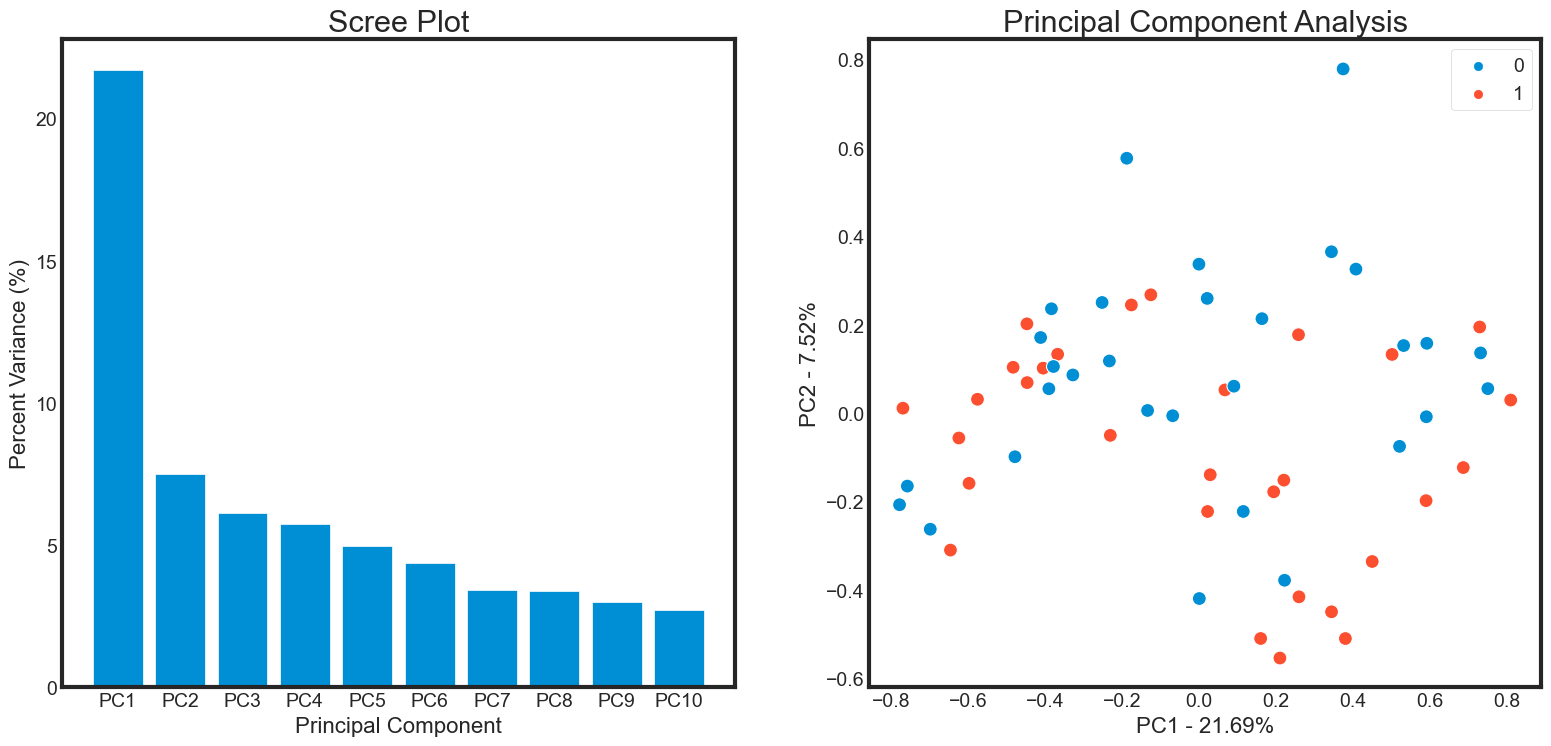

In [135]:
# PCA for the meta abundance data 
%matplotlib inline
PCA_Plotter(df=ma_t, status=meta_asd_status)

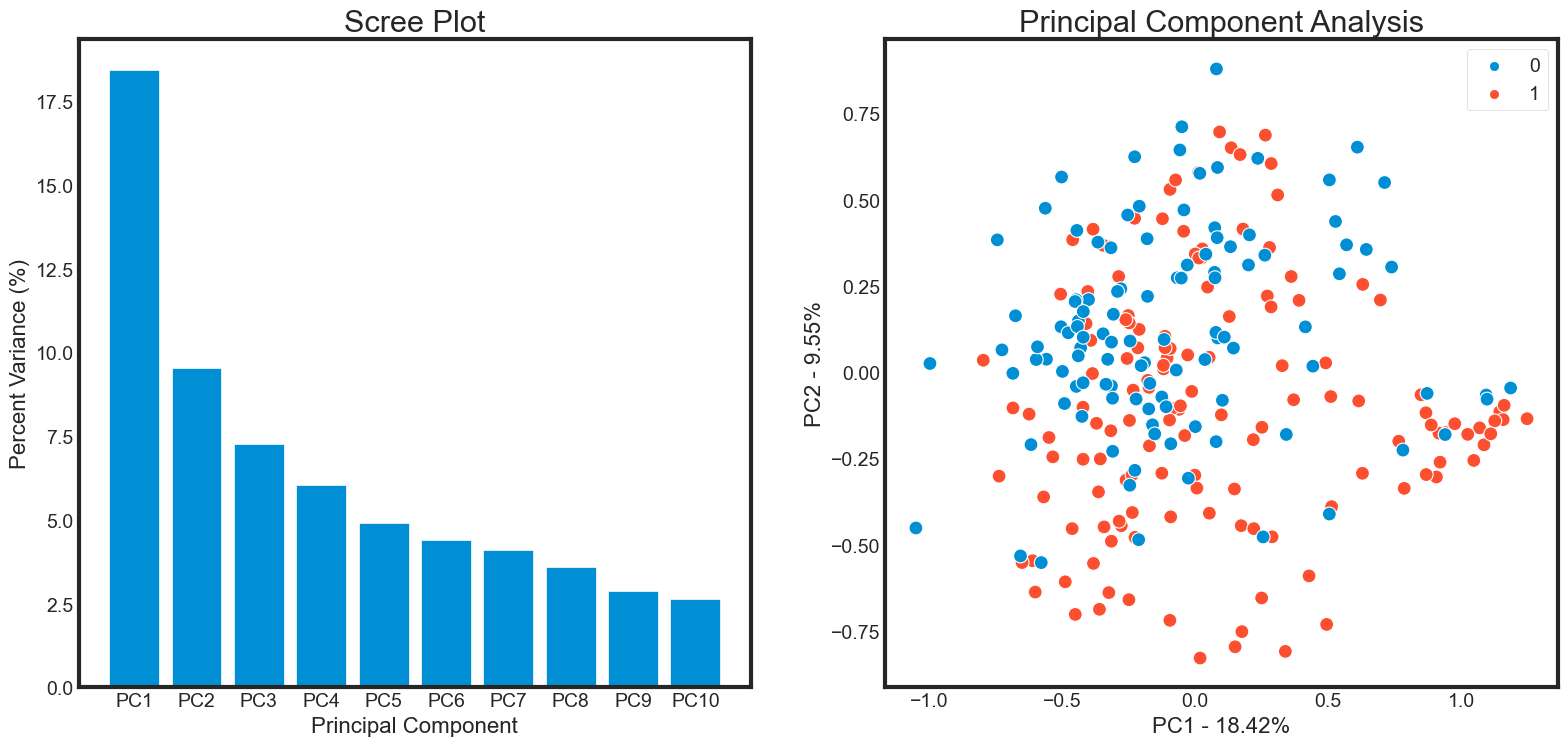

In [136]:
# PCA for the 16s rRNA data
PCA_Plotter(df=rRNA_t, status=rRNA_asd_status)

#### Running UMAP Next

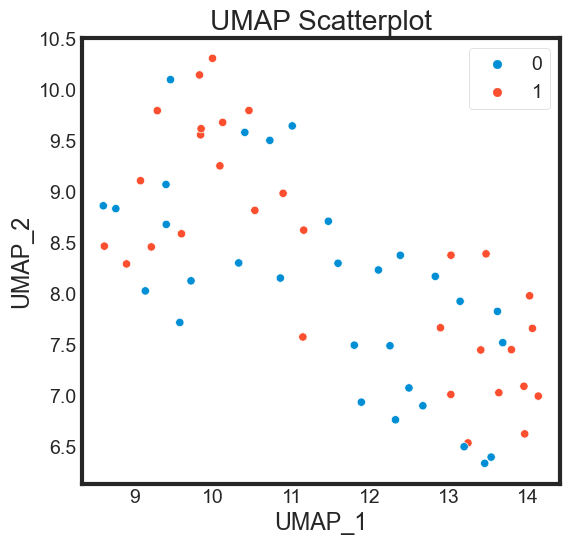

In [137]:
# UMAP on the metabundance data
UMAPer(df=ma_t, status=meta_asd_status)

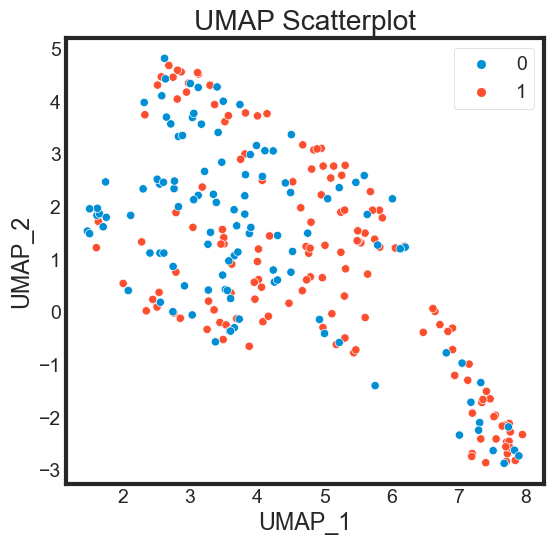

In [138]:
# UMAP on the 16s rRNA data 
UMAPer(df=rRNA_t, status=rRNA_asd_status)

# Train Test Split

In [139]:
from sklearn.model_selection import train_test_split

# spliting meda abundance dataset
X_trainMeta ,X_testMeta ,y_trainMeta ,y_testMeta = train_test_split(ma_t,meta_asd_status, test_size=0.2,random_state=42)

# spliting 16sRNA dataset
X_trainRna ,X_testRna ,y_trainRna ,y_testRna = train_test_split(rRNA_t,rRNA_asd_status, test_size=0.2,random_state=42)

# print ("Train samples",len(X_trainMeta)+len(X_trainRna))
print ("Total Train samples : ",len(X_trainMeta)+len(X_trainRna))
print ("Total Test samples :",len(y_testMeta)+len(X_testRna))


print ("Meta Train samples :",len(X_trainMeta))
print ("Meta Test samples :",len(y_testMeta))
print ("RNA Train samples :",len(X_trainRna))
print ("RNA Test samples :",len(X_testRna))

Total Train samples :  251
Total Test samples : 63
Meta Train samples : 48
Meta Test samples : 12
RNA Train samples : 203
RNA Test samples : 51


# Training

## Running Supervised Machine Learning Algorithms with K Fold Cross Validation

In [140]:
# Supervised Machine Learning Algorithms 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import  f1_score, recall_score, precision_score ,accuracy_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


# K fold cross validation 
from sklearn.model_selection import cross_val_score

In [141]:
def ML_tester(model, df, key, fold):
    
    score = cross_val_score(model, df, key, cv=fold)
    ml_df = pd.DataFrame({'Model': str(model), 'Scores': score})
    
    # Returns a pandas dataframe with the scores of the test model included
    return(score, ml_df)


### Running supervised learning algorithms on the meta abundance dataset first

We can choose from LogisticRegression(), SVC(), and RandomForestClassifier() for our supervised learning models

In [142]:
# Logistic Regression
lr_scores, lr_df = ML_tester(model=LogisticRegression(), df=ma_t, key=meta_asd_status, fold=5)

In [143]:
# SVM
svm_scores, svm_df = ML_tester(model=SVC(), df=ma_t, key=meta_asd_status, fold=5)

In [144]:
# Testing different tree numbers for Random Forest 
trees = [3, 6, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for tree in trees:
    scores, df = ML_tester(model=RandomForestClassifier(n_estimators=tree), df=ma_t, key=meta_asd_status, fold=5)
    print("Average scores for {}".format(tree), "trees are", np.mean(scores))

Average scores for 3 trees are 0.7
Average scores for 6 trees are 0.75
Average scores for 10 trees are 0.8
Average scores for 20 trees are 0.7666666666666666
Average scores for 30 trees are 0.8166666666666667
Average scores for 40 trees are 0.8
Average scores for 50 trees are 0.7666666666666667
Average scores for 60 trees are 0.8
Average scores for 70 trees are 0.7833333333333334
Average scores for 80 trees are 0.8166666666666667
Average scores for 90 trees are 0.8333333333333333
Average scores for 100 trees are 0.7666666666666667


In [145]:
# Random Forest with 30 trees gave good accuracy
rf_scores, rf_df = ML_tester(model=RandomForestClassifier(n_estimators=30), df=ma_t, key=meta_asd_status, fold=5)

In [146]:
# Testing different tree numbers for Gradient boost 
trees = [3, 6, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for tree in trees:
    scores, df = ML_tester(model=GradientBoostingClassifier(n_estimators=tree), df=ma_t, key=meta_asd_status, fold=5)
    print("Average scores for {}".format(tree), "trees are", np.mean(scores))

Average scores for 3 trees are 0.7
Average scores for 6 trees are 0.7
Average scores for 10 trees are 0.7333333333333333
Average scores for 20 trees are 0.7
Average scores for 30 trees are 0.7
Average scores for 40 trees are 0.7
Average scores for 50 trees are 0.7
Average scores for 60 trees are 0.7166666666666667
Average scores for 70 trees are 0.7
Average scores for 80 trees are 0.7
Average scores for 90 trees are 0.7166666666666667
Average scores for 100 trees are 0.7166666666666667


In [147]:
# Gradient boost classifier with 30 trees gave goof enough accuracy 
Gb_scores, Gb_df = ML_tester(model=GradientBoostingClassifier(n_estimators=30), df=ma_t, key=meta_asd_status, fold=5)

In [148]:
# Merging all machine learning score dataframes for graphing 
score_df = pd.concat([lr_df, svm_df, rf_df, Gb_df], axis=0, ignore_index=True)
models = {'LogisticRegression()': 'Logistic Regression', 'SVC()': 'SVM', 'RandomForestClassifier(n_estimators=30)': 'Random Forest','GradientBoostingClassifier(n_estimators=30)': 'Gradient Boost'}
score_df = score_df.replace({'Model': models})
display(score_df.groupby('Model').mean())

,Scores
Model,
Gradient Boost,0.716667
Logistic Regression,0.683333
Random Forest,0.766667
SVM,0.600000


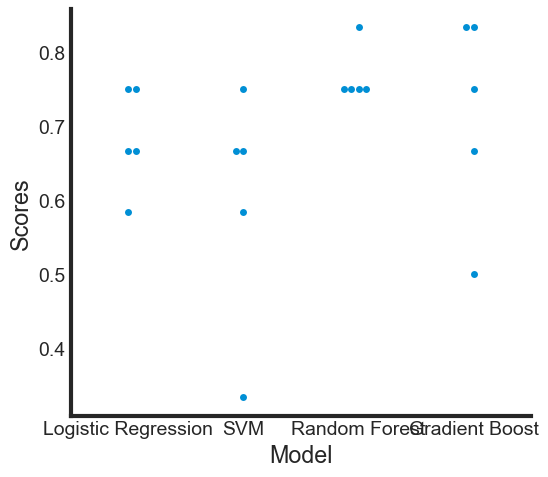

In [149]:
# Plotting the 5 fold cross validation results for the 4 machine learning models used
%matplotlib inline
sns.set_style('white')
sns.catplot(data=score_df, x='Model', y='Scores', kind='swarm',)

plt.subplots_adjust(left=0.01)
plt.show()

In [150]:
model_RandomForest = RandomForestClassifier(n_estimators=30)
model_GradientBoost = GradientBoostingClassifier(n_estimators=30)

model_RandomForest.fit(X_trainMeta,y_trainMeta)
model_GradientBoost.fit(X_trainMeta,y_trainMeta)


GradientBoostingClassifier(n_estimators=30)

In [151]:
y_predMetaR = model_RandomForest.predict(X_testMeta)
y_predMetaG = model_GradientBoost.predict(X_testMeta)

print("Accuraacy score for Random forest",accuracy_score(y_testMeta,y_predMetaR))
print("Accuraacy score for Gradient boost",accuracy_score(y_testMeta,y_predMetaG))

Accuraacy score for Random forest 0.5
Accuraacy score for Gradient boost 0.6666666666666666


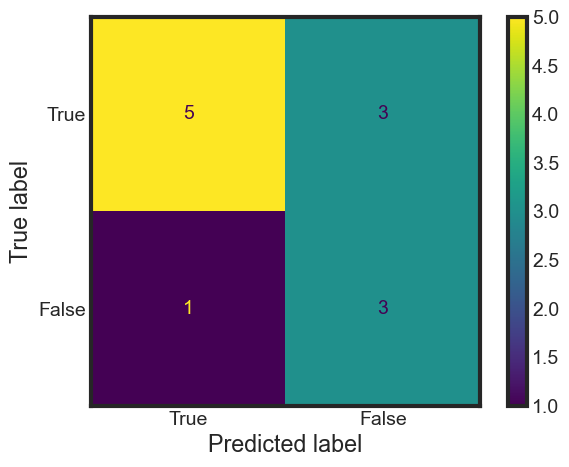

In [152]:
confusion_matrix = metrics.confusion_matrix(y_testMeta,y_predMetaG)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.show()


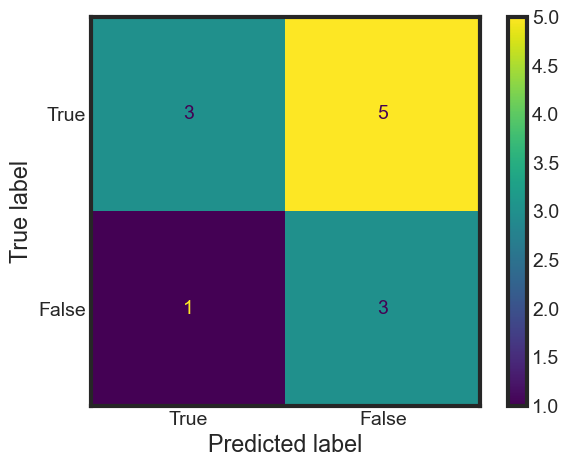

In [153]:
confusion_matrix = metrics.confusion_matrix(y_testMeta,y_predMetaR)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.show()

In [154]:
f1Scores = f1_score(y_testMeta,y_predMetaR)
recallScore = recall_score(y_testMeta,y_predMetaR)
precisionScore = precision_score(y_testMeta,y_predMetaR)
print("Random forest classifier ")
print("f1 score :", f1Scores,"\n","recall score :",recallScore,"\n","precision score",precisionScore)

Random forest classifier 
f1 score : 0.5 
 recall score : 0.75 
 precision score 0.375


In [155]:
f1Scores = f1_score(y_testMeta,y_predMetaG)
recallScore = recall_score(y_testMeta,y_predMetaG)
precisionScore = precision_score(y_testMeta,y_predMetaG)
print("Gradient boosting classifier ")
print("f1 score :", f1Scores,"\n","recall score :",recallScore,"\n","precision score",precisionScore)

Gradient boosting classifier 
f1 score : 0.6 
 recall score : 0.75 
 precision score 0.5


### Running supervised learning algorithms on the 16s rRNA dataset next

We can choose from LogisticRegression(), SVC(), and RandomForestClassifier() for our supervised learning models

In [156]:
# Logistic Regression
lr_scores, lr_df = ML_tester(model=LogisticRegression(), df=rRNA_t, key=rRNA_asd_status, fold=5)

In [157]:
# SVM
svm_scores, svm_df = ML_tester(model=SVC(), df=rRNA_t, key=rRNA_asd_status, fold=5)

In [158]:
# Testing different tree numbers for Random Forest 
trees = [3, 6, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for tree in trees:
    scores, df = ML_tester(model=RandomForestClassifier(n_estimators=tree), df=rRNA_t, key=rRNA_asd_status, fold=5)
    print("Average scores for {}".format(tree), "trees are", np.mean(scores))

Average scores for 3 trees are 0.6727058823529413
Average scores for 6 trees are 0.7156862745098039
Average scores for 10 trees are 0.7590588235294118
Average scores for 20 trees are 0.8221176470588235
Average scores for 30 trees are 0.8061176470588235
Average scores for 40 trees are 0.8218823529411765
Average scores for 50 trees are 0.8178823529411765
Average scores for 60 trees are 0.8139607843137255
Average scores for 70 trees are 0.8374901960784313
Average scores for 80 trees are 0.8137254901960784
Average scores for 90 trees are 0.8021960784313726
Average scores for 100 trees are 0.8178039215686275


In [159]:
# Random Forest with 30 trees - it looks like 30 tress is good enough
rf_scores, rf_df = ML_tester(model=RandomForestClassifier(n_estimators=30), df=rRNA_t, key=rRNA_asd_status, fold=5)

In [160]:
# Testing different tree numbers for Gradient Boost
trees = [3, 6, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for tree in trees:
    scores, df = ML_tester(model=GradientBoostingClassifier(n_estimators=tree), df=rRNA_t, key=rRNA_asd_status, fold=5)
    print("Average scores for {}".format(tree), "trees are", np.mean(scores))

Average scores for 3 trees are 0.7276862745098039
Average scores for 6 trees are 0.7553725490196079
Average scores for 10 trees are 0.7709803921568628
Average scores for 20 trees are 0.7747450980392158
Average scores for 30 trees are 0.7747450980392158
Average scores for 40 trees are 0.7747450980392158
Average scores for 50 trees are 0.7865882352941177
Average scores for 60 trees are 0.7866666666666667
Average scores for 70 trees are 0.7785882352941177
Average scores for 80 trees are 0.7904313725490196
Average scores for 90 trees are 0.7825882352941177
Average scores for 100 trees are 0.7827450980392158


In [161]:
# Random Forest with 30 trees is good enough
Gb_scores, Gb_df = ML_tester(model=GradientBoostingClassifier(n_estimators=30), df=rRNA_t, key=rRNA_asd_status, fold=5)

In [162]:
# Merging all machine learning score dataframes for graphing 
score_df = pd.concat([lr_df, svm_df, rf_df, Gb_df], axis=0, ignore_index=True)
models = {'LogisticRegression()': 'Logistic Regression', 'SVC()': 'SVM', 'RandomForestClassifier(n_estimators=30)': 'Random Forest','GradientBoostingClassifier(n_estimators=30)': 'Gradient Boost'}
score_df = score_df.replace({'Model': models})
display(score_df.groupby('Model').mean())

,Scores
Model,
Gradient Boost,0.770745
Logistic Regression,0.637647
Random Forest,0.802353
SVM,0.637412


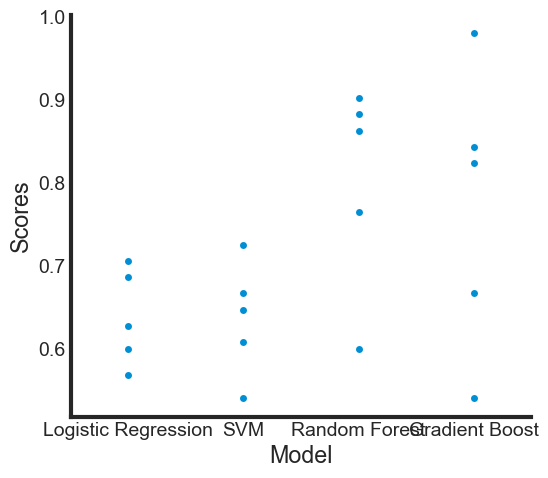

In [163]:
# Plotting the 5 fold cross validation results for the 3 machine learning models used
%matplotlib inline
sns.set_style('white')
sns.catplot(data=score_df, x='Model', y='Scores', kind='swarm')

plt.subplots_adjust(left=0.01)
plt.show()

In [164]:
model_RandomForest = RandomForestClassifier(n_estimators=30)
model_GradientBoost = GradientBoostingClassifier(n_estimators=30)
model_RandomForest.fit(X_trainRna ,y_trainRna)
model_GradientBoost.fit(X_trainRna ,y_trainRna)

GradientBoostingClassifier(n_estimators=30)

In [165]:
y_predRnaR = model_RandomForest.predict(X_testRna)
y_predRnaG = model_GradientBoost.predict(X_testRna)

print("Accuraacy score for Random forest",accuracy_score(y_testRna ,y_predRnaR))
print("Accuraacy score for Gradient boost",accuracy_score(y_testRna ,y_predRnaG))

Accuraacy score for Random forest 0.9803921568627451
Accuraacy score for Gradient boost 0.9411764705882353


In [166]:
f1_score(y_testRna ,y_predRnaR)

0.9803921568627451

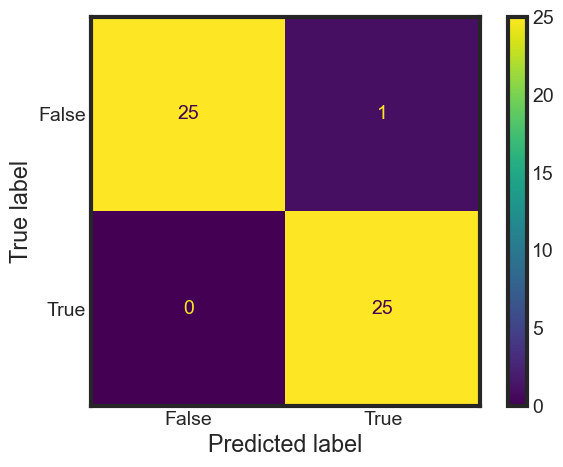

In [167]:
confusion_matrix = metrics.confusion_matrix(y_testRna ,y_predRnaR)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

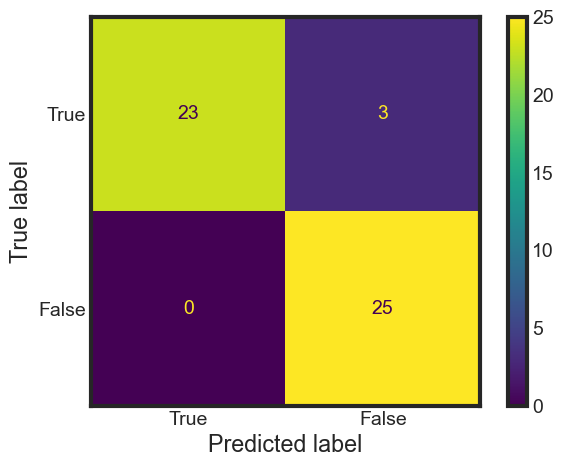

In [168]:
confusion_matrix = metrics.confusion_matrix(y_testRna ,y_predRnaG)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.show()

In [169]:
f1Scores = f1_score(y_testRna ,y_predRnaG)
recallScore = recall_score(y_testRna ,y_predRnaG)
precisionScore = precision_score(y_testRna ,y_predRnaG)
print("Gradient boosting classifier ")
print("f1 score :", f1Scores,"\n","recall score :",recallScore,"\n","precision score",precisionScore)

Gradient boosting classifier 
f1 score : 0.9433962264150945 
 recall score : 1.0 
 precision score 0.8928571428571429


In [170]:
f1Scores = f1_score(y_testRna ,y_predRnaR)
recallScore = recall_score(y_testRna ,y_predRnaR)
precisionScore = precision_score(y_testRna ,y_predRnaR)
print("Random forest classifier ")
print("f1 score :", f1Scores,"\n","recall score :",recallScore,"\n","precision score",precisionScore)

Random forest classifier 
f1 score : 0.9803921568627451 
 recall score : 1.0 
 precision score 0.9615384615384616


## Using Principle coomponent training

In [171]:
# Principle component on meta data abundace dataset

pca_exam = PCA(0.95)
x_pca_exam = pca_exam.fit_transform(ma_t)
print(x_pca_exam.shape)

# Train test split
Xtrain, Xtest,ytrain ,ytest =train_test_split(x_pca_exam , meta_asd_status,test_size=0.2, random_state=23)

(60, 37)


In [172]:
RandomForest = RandomForestClassifier(n_estimators=30)
model_RandomForest.fit(Xtrain ,ytrain)
y_pred = model_RandomForest.predict(Xtest)
print("Accuraacy score of Meta abundance dataset Principle componets for Random forest model",accuracy_score(ytest ,y_pred))

Accuraacy score of Meta abundance dataset Principle componets for Random forest model 0.6666666666666666


In [173]:
# Principle component on meta data abundace dataset

pca_exam = PCA(0.95)
x_pca_exam = pca_exam.fit_transform(ma_t)
print(x_pca_exam.shape)

# Train test split
Xtrain, Xtest,ytrain ,ytest =train_test_split(x_pca_exam , meta_asd_status,test_size=0.2, random_state=23)

(60, 37)


In [174]:
RandomForest = RandomForestClassifier(n_estimators=30)
model_RandomForest.fit(Xtrain ,ytrain)
y_pred = model_RandomForest.predict(Xtest)
print("Accuraacy score of Meta abundance dataset Principle componets for Random forest model",accuracy_score(ytest ,y_pred))

Accuraacy score of Meta abundance dataset Principle componets for Random forest model 0.75


## Detecting features which will discriminate between ASD and HC

In [175]:
from sklearn.feature_selection import SelectKBest, f_classif

# X is your feature matrix, y is your target variable
selector = SelectKBest(f_classif, k=5)
X_top5 = selector.fit_transform(ma_t, meta_asd_status)

# Get the column indices of the top 5 features
top5_indices = selector.get_support(indices=True)

# Get the column names of the top 5 features
top5_column_names = ma_t.columns[top5_indices]

# Print or use the column names as needed
print("Top 5 feature column names:", top5_column_names)


Top 5 feature column names: Index(['g__Prevotella;s__Prevotella sp. CAG:1320',
       'g__Bacteroides;s__Bacteroides sp. CAG:633',
       'g__Prevotella;s__Prevotella amnii',
       'g__Bacteroides;s__Bacteroides sp. Marseille-P2824',
       'g__Prevotella;s__Prevotella sp. P5-125'],
      dtype='object', name='Taxonomy')


In [176]:
from sklearn.feature_selection import SelectKBest, f_classif

# X is your feature matrix, y is your target variable
selector = SelectKBest(f_classif, k=5)
X_top5 = selector.fit_transform(rRNA_t, rRNA_asd_status)

# Get the column indices of the top 5 features
top5_indices = selector.get_support(indices=True)

# Get the column names of the top 5 features
top5_column_names = rRNA_t.columns[top5_indices]

# Print or use the column names as needed
print("Top 5 feature column names:", top5_column_names)

Top 5 feature column names: Index(['d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Ruminococcaceae;_g__Ruminiclostridium_6;_s__[Eubacterium]_siraeum_DSM_15702',
       'd__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Lachnospiraceae;_g__[Eubacterium]_xylanophilum_group;_s__unclassified_g__[Eubacterium]_xylanophilum_group',
       'd__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Ruminococcaceae;_g__Ruminiclostridium_6;_s__unclassified_g__Ruminiclostridium_6',
       'd__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Lachnospiraceae;_g__Blautia;_s__Ruminococcus_sp._DJF_VR70k1',
       'd__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Ruminococcaceae;_g__Ruminococcaceae_UCG-014;_s__uncultured_Ruminococcaceae_bacterium_g__Ruminococcaceae_UCG-014'],
      dtype='object', name='taxonomy')


In [177]:
newdf = rRNA_t [top5_column_names]
Xtrain, Xtest,ytrain ,ytest =train_test_split(newdf , rRNA_asd_status,test_size=0.2, random_state=23)

In [178]:
model_RandomForest = RandomForestClassifier(n_estimators=30)
model_RandomForest.fit(Xtrain ,ytrain)
y_predRnaR = model_RandomForest.predict(Xtest)
print("Accuraacy score for Random forest",accuracy_score(ytest ,y_predRnaR))

Accuraacy score for Random forest 0.8431372549019608


In [179]:
f1Scores = f1_score(ytest ,y_predRnaR)
recallScore = recall_score(ytest ,y_predRnaR)
precisionScore = precision_score(ytest ,y_predRnaR)
print("Random forest classifier ")
print("f1 score :", f1Scores,"\n","recall score :",recallScore,"\n","precision score",precisionScore)

Random forest classifier 
f1 score : 0.8620689655172413 
 recall score : 0.8620689655172413 
 precision score 0.8620689655172413


### ANN for Training the top indicators

In [182]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

model = Sequential([
    tf.keras.layers.Dense(15, input_shape=(6,), activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(Xtrain, ytrain, epochs=400)


Epoch 1/400
7/7 [==============================] - 1s 3ms/step - loss: 0.6942 - accuracy: 0.5616
Epoch 2/400
7/7 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5616
Epoch 3/400
7/7 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5616
Epoch 4/400
7/7 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5616
Epoch 5/400
7/7 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.5616
Epoch 6/400
7/7 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5616
Epoch 7/400
7/7 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5616
Epoch 8/400
7/7 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5616
Epoch 9/400
7/7 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.5616
Epoch 10/400
7/7 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.5616
Epoch 11/400
7/7 [===========

7/7 [==============================] - 0s 4ms/step - loss: 0.5207 - accuracy: 0.7586
Epoch 168/400
7/7 [==============================] - 0s 3ms/step - loss: 0.5206 - accuracy: 0.7586
Epoch 169/400
7/7 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.7586
Epoch 170/400
7/7 [==============================] - 0s 5ms/step - loss: 0.5211 - accuracy: 0.7586
Epoch 171/400
7/7 [==============================] - 0s 4ms/step - loss: 0.5222 - accuracy: 0.7586
Epoch 172/400
7/7 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.7586
Epoch 173/400
7/7 [==============================] - 0s 1ms/step - loss: 0.5198 - accuracy: 0.7635
Epoch 174/400
7/7 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.7685
Epoch 175/400
7/7 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.7685
Epoch 176/400
7/7 [==============================] - 0s 2ms/step - loss: 0.5202 - accuracy: 0.7586
Epoch 177/400
7/7 [=====

7/7 [==============================] - 0s 3ms/step - loss: 0.5177 - accuracy: 0.7635
Epoch 332/400
7/7 [==============================] - 0s 3ms/step - loss: 0.5165 - accuracy: 0.7635
Epoch 333/400
7/7 [==============================] - 0s 3ms/step - loss: 0.5162 - accuracy: 0.7783
Epoch 334/400
7/7 [==============================] - 0s 3ms/step - loss: 0.5159 - accuracy: 0.7783
Epoch 335/400
7/7 [==============================] - 0s 3ms/step - loss: 0.5162 - accuracy: 0.7734
Epoch 336/400
7/7 [==============================] - 0s 3ms/step - loss: 0.5165 - accuracy: 0.7635
Epoch 337/400
7/7 [==============================] - 0s 2ms/step - loss: 0.5167 - accuracy: 0.7685
Epoch 338/400
7/7 [==============================] - 0s 3ms/step - loss: 0.5160 - accuracy: 0.7734
Epoch 339/400
7/7 [==============================] - 0s 3ms/step - loss: 0.5163 - accuracy: 0.7734
Epoch 340/400
7/7 [==============================] - 0s 3ms/step - loss: 0.5159 - accuracy: 0.7734
Epoch 341/400
7/7 [=====

In [183]:
model.evaluate(Xtest,ytest)

2/2 [==============================] - 0s 0s/step - loss: 0.6144 - accuracy: 0.6667


[0.6143919825553894, 0.6666666865348816]